In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
NBA = pd.read_csv( 'NBA_PLAYERS.csv' ) 

print(NBA.info())
print(NBA.describe())
NBA.head()
## Will Chris Paul make the HOF (Hall of Fame) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5313 non-null   object 
 1   Debut     5313 non-null   int64  
 2   Final     5313 non-null   int64  
 3   Position  5313 non-null   object 
 4   Height    5313 non-null   int64  
 5   Weight    5308 non-null   float64
 6   Birthday  5297 non-null   object 
 7   School    4917 non-null   object 
 8   HOF       5313 non-null   bool   
 9   Active    5313 non-null   bool   
 10  G         5313 non-null   int64  
 11  PTS       5313 non-null   float64
 12  TRB       5021 non-null   float64
 13  AST       5313 non-null   float64
 14  FG%       5278 non-null   float64
 15  FG3%      3656 non-null   float64
 16  FT%       5060 non-null   float64
 17  eFG%      4156 non-null   float64
 18  PER       4965 non-null   float64
 19  WS        5312 non-null   float64
dtypes: bool(2), float64(10), int64

,Name,Debut,Final,Position,Height,Weight,Birthday,School,HOF,Active,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS
0,Alaa Abdelnaby,1991,1995,"['Forward', 'Center']",82,240.0,"June 24, 1968",['Duke'],False,False,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8
1,Zaid Abdul-Aziz,1969,1978,"['Center', 'Forward']",81,235.0,"April 7, 1946",['Iowa State'],False,False,505,9.0,8.0,1.2,42.8,NaN,72.8,NaN,15.1,17.5
2,Kareem Abdul-Jabbar,1970,1989,['Center'],86,225.0,"April 16, 1947",['UCLA'],True,False,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4
3,Mahmoud Abdul-Rauf,1991,2001,['Guard'],73,162.0,"March 9, 1969",['LSU'],False,False,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2
4,Tariq Abdul-Wahad,1998,2003,['Forward'],78,223.0,"November 3, 1974","['Michigan', ' San Jose State']",False,False,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5


In [40]:
if ( 'Birthday' in NBA ): 
    NBA.drop( columns=[ 'Birthday', 'Active', 'Debut', 'Final', 'PER' ] ) 
    #Their birthday, active, when they played and PER doesn't effect their Chances of making the HOF
NBA.dropna(axis=0, inplace=True) 
NBA[ 'HOF' ].replace( {'False':0, 'True':1}, inplace=True )
NBA.head()

C:\Users\kaelv\AppData\Local\Temp\ipykernel_7456\1478380617.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NBA[ 'HOF' ].replace( {'False':0, 'True':1}, inplace=True )


,Name,Debut,Final,Position,Height,Weight,Birthday,School,HOF,Active,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS
0,Alaa Abdelnaby,1991,1995,"['Forward', 'Center']",82,240.0,"June 24, 1968",['Duke'],False,False,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8
2,Kareem Abdul-Jabbar,1970,1989,['Center'],86,225.0,"April 16, 1947",['UCLA'],True,False,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4
3,Mahmoud Abdul-Rauf,1991,2001,['Guard'],73,162.0,"March 9, 1969",['LSU'],False,False,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2
4,Tariq Abdul-Wahad,1998,2003,['Forward'],78,223.0,"November 3, 1974","['Michigan', ' San Jose State']",False,False,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5
5,Shareef Abdur-Rahim,1997,2008,['Forward'],81,225.0,"December 11, 1976",['California'],False,False,830,18.1,7.5,2.5,47.2,29.7,81.0,47.9,19.0,71.2


## Graph that shows how many were accepted by postiion 

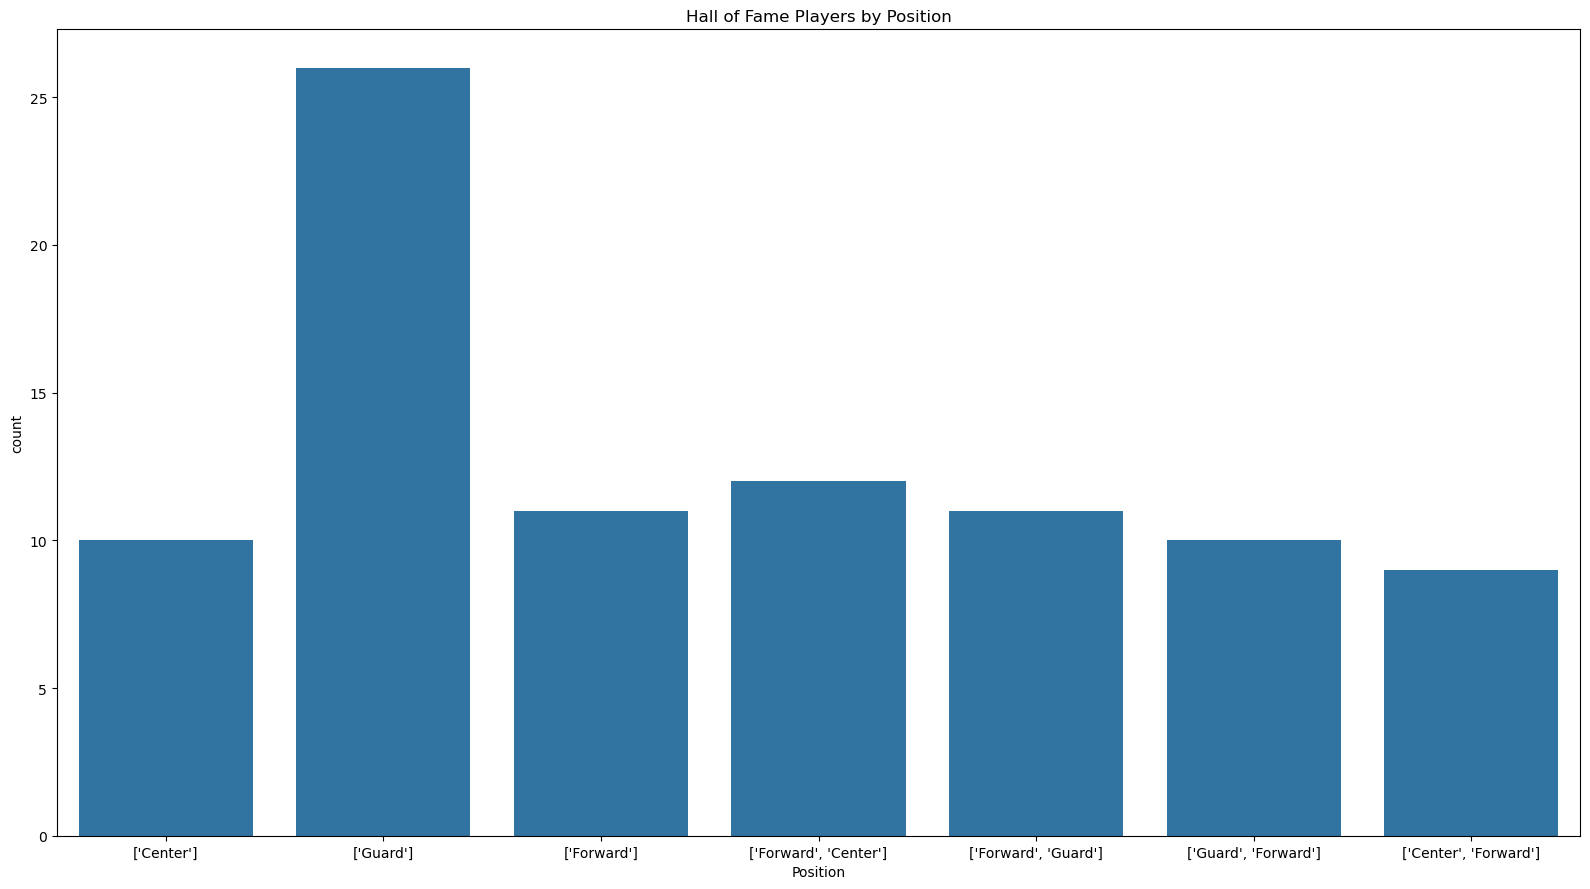

In [41]:

plt.figure(figsize=(16,9))
sns.countplot(data=NBA[NBA['HOF'] == 1], x='Position')
plt.title("Hall of Fame Players by Position")
plt.tight_layout()
plt.show()

## Graph to show the pts/game ranges

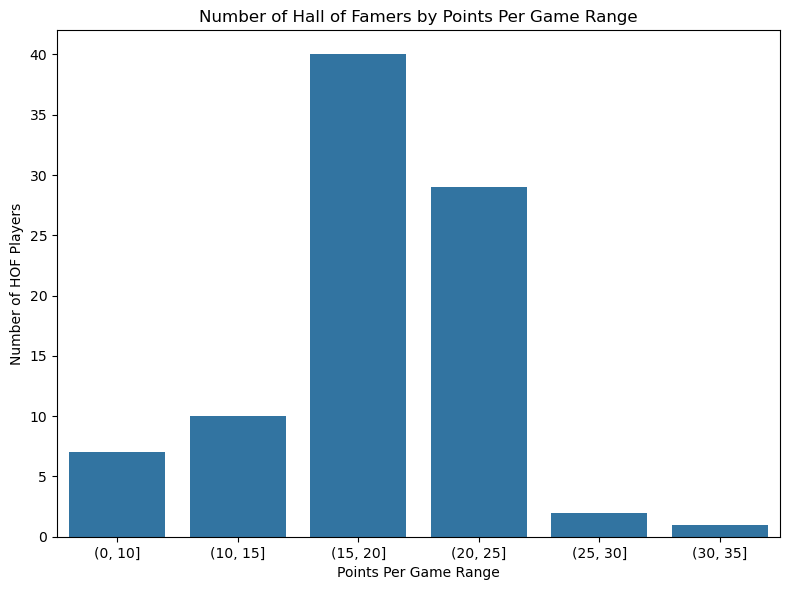

In [42]:
pnt_bins = [0, 10, 15, 20, 25, 30, 35]
labels = ['<10', '10–15', '15–20', '20–25', '25–30', '30–35']

NBA['Pts_avg_range'] = pd.cut(NBA['PTS'], bins=pnt_bins)


hof_only = NBA[NBA['HOF'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(data=hof_only, x='Pts_avg_range')
plt.title("Number of Hall of Famers by Points Per Game Range")
plt.xlabel("Points Per Game Range")
plt.ylabel("Number of HOF Players")
plt.tight_layout()
plt.show()


## Win shares by hall of famers and non hOF

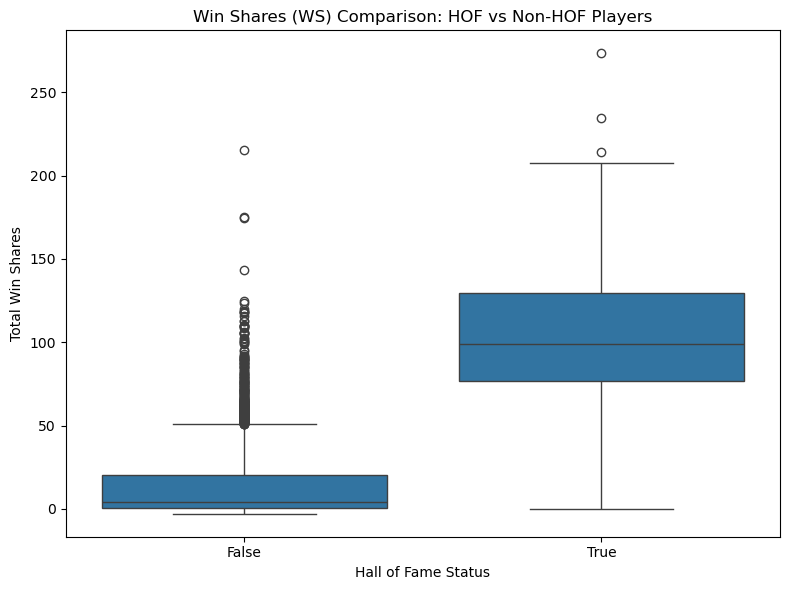

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=NBA, x='HOF', y='WS')
plt.title('Win Shares (WS) Comparison: HOF vs Non-HOF Players')
plt.xlabel('Hall of Fame Status')
plt.ylabel('Total Win Shares')
plt.tight_layout()
plt.show()


## The rate by their feild goal percentage

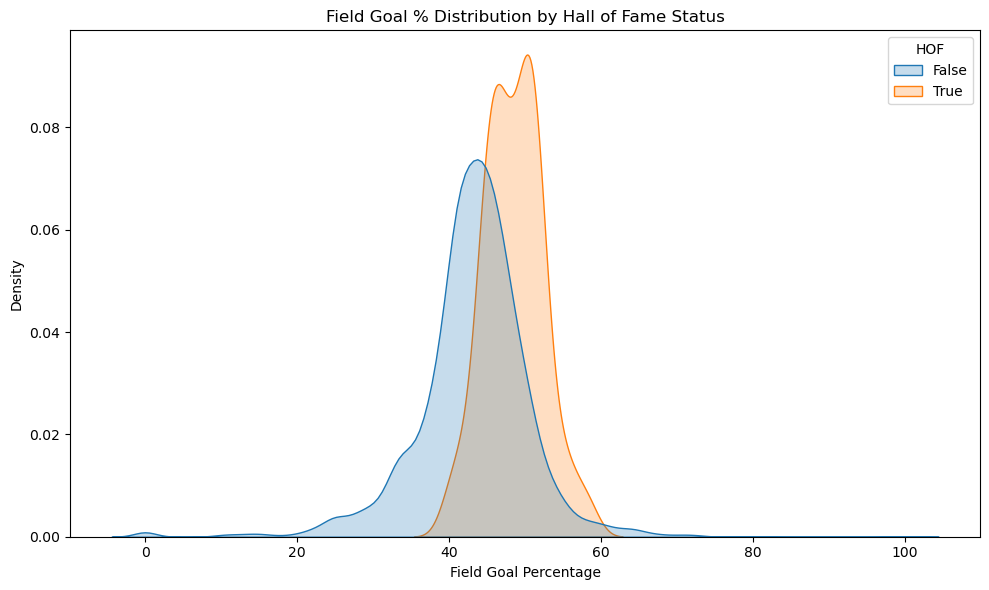

In [44]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=NBA, x='FG%', hue='HOF', fill=True, common_norm=False)
plt.title('Field Goal % Distribution by Hall of Fame Status')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['G', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'WS']
X = NBA[features]           
y = NBA['HOF'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9798761609907121
Confusion Matrix:
 [[627   5]
 [  8   6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       632
        True       0.55      0.43      0.48        14

    accuracy                           0.98       646
   macro avg       0.77      0.71      0.73       646
weighted avg       0.98      0.98      0.98       646



In [51]:
goat_data = pd.DataFrame([{
    'G': 39,
    'PTS': 5.7,
    'TRB': 4.1,
    'AST': 0.8,
    'FG%': 0.412,
    'FG3%': 0.267,
    'FT%': 0.771,
    'eFG%': 0.474,
    'WS': 1.4
}])


prediction = model.predict(goat_data)

print("HOF Prediction:", "Yes" if prediction[0] == 1 else "No")
probability = model.predict_proba(goat_data)
print("Probability of making HOF:", round(probability[0][1] * 100, 2), "%")


HOF Prediction: No
Probability of making HOF: 1.54 %
